### Acadgild Project 2


### Predicting Players Rating
In this project you are going to predict the overall rating of soccer player based on their attributes
such as 'crossing', 'finishing etc.

The dataset you are going to use is from European Soccer Database
(https://www.kaggle.com/hugomathien/soccer) has more than 25,000 matches and more than
10,000 players for European professional soccer seasons from 2008 to 2016.

Download the data in the same folder and run the following commmand to get it in the environment
### About the Dataset
#### The ultimate Soccer database for data analysis and machine learning

The dataset comes in the form of an SQL database and contains statistics of about 25,000 football
matches, from the top football league of 11 European Countries. It covers seasons from 2008 to
2016 and contains match statistics (i.e: scores, corners, fouls etc...) as well as the team formations,
with player names and a pair of coordinates to indicate their position on the pitch.
 - +25,000 matches
 - +10,000 players
 - 11 European Countries with their lead championship
 - Seasons 2008 to 2016
 - Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
 - Team line up with squad formation (X, Y coordinates)
 - Betting odds from up to 10 providers
 - Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000 matches
 
The dataset also has a set of about 35 statistics for each player, derived from EA Sports' FIFA video
games. It is not just the stats that come with a new version of the game but also the weekly
updates. So for instance if a player has performed poorly over a period of time and his stats get
impacted in FIFA, you would normally see the same in the dataset.

### Python skills required to complete this project

#### SQL:
The data is in SQL database so students need to retrive using query language. They also need to
know how to connect SQL database woth python. The library we are using for this in 'sqlite3'.
1/19/2018 ML Project(Updated) (1)
http://localhost:8888/notebooks/20th%20Januray/ML%20Project(Updated)%20(1).ipynb# 2/4
SQLite3 can be integrated with Python using sqlite3 module, which was written by Gerhard Haring.
It provides an SQL interface compliant with the DB-API 2.0 specification described by PEP 249. You
do not need to install this module separately because it is shipped by default along with Python
version 2.5.x onwards.

To use sqlite3 module, you must first create a connection object that represents the database and
then optionally you can create a cursor object, which will help you in executing all the SQL
statements.


#### Pandas:
Pandas is an open-source, BSD-licensed Python library providing high-performance, easy-to-use
data structures and data analysis tools for the Python programming language. Python with Pandas
is used in a wide range of fields including academic and commercial domains including finance,
economics, Statistics, analytics, etc.In this tutorial, we will learn the various features of Python
Pandas and how to use them in practice.


#### Scikit Learn
Scikit-learn provides a range of supervised and unsupervised learning algorithms via a consistent
interface in Python.

The library is built upon the SciPy (Scientific Python) that must be installed before you can use
scikit-learn. This stack that includes:
- NumPy: Base n-dimensional array package
- SciPy: Fundamental library for scientific computing
- Matplotlib: Comprehensive 2D/3D plotting
- IPython: Enhanced interactive console
- Sympy: Symbolic mathematics
- Pandas: Data structures and analysis

Extensions or modules for SciPy care conventionally named SciKits. As such, the module provides
learning algorithms and is named scikit-learn.

The vision for the library is a level of robustness and support required for use in production systems.
This means a deep focus on concerns such as easy of use, code quality, collaboration,
documentation and performance.


#### Import Libraries

In [212]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns

#### Read Data from the Database into pandas


In [189]:
# Create your connection.
cnx = sqlite3.connect('soccer/database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

#### Take a peak at the sql db

In [190]:
cursor = cnx.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('sqlite_sequence',), ('Player_Attributes',), ('Player',), ('Match',), ('League',), ('Country',), ('Team',), ('Team_Attributes',)]


In [191]:
df.head(2)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


#### How big is the data

In [192]:
df.shape

(183978, 42)

### Summary of the data

In [193]:
df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


#### Index Information

In [194]:
df.keys()

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [195]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

#### check for null

In [196]:
df.isnull().sum(axis=0)

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

##### wow, that's a lot of nulls... let's clean them up by dropping them

In [197]:
df = df.dropna()

##### now check that the drop worked

In [198]:
df.isnull().sum(axis=0)

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


#### check for overall correlation using pearson ... remember pearson runs from -1 to 1 ... and around 0.7 is decent enough for us to look at

In [199]:
df['overall_rating'] = df['overall_rating'].astype('int')
df.corr(method='pearson',min_periods=1).transpose().sort_values('overall_rating', ascending=False)

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
overall_rating,-0.003738,-0.278703,-0.328315,1.000000,0.765435,0.357320,0.330079,0.313324,0.458243,0.361739,...,0.431493,0.392715,0.132185,0.163986,0.128054,0.027675,0.006717,0.028799,0.008029,0.007804
reactions,-0.005740,-0.233465,-0.312538,0.771856,0.580991,0.384999,0.354769,0.295601,0.460469,0.397448,...,0.452559,0.390045,0.123173,0.159255,0.137098,-0.073940,-0.079753,-0.033067,-0.078091,-0.078300
potential,0.000837,-0.021252,0.010588,0.765435,1.000000,0.277284,0.287838,0.206063,0.382538,0.301678,...,0.379278,0.315207,0.054094,0.082073,0.063284,-0.012283,0.005865,0.092299,0.004472,0.004936
short_passing,-0.006701,-0.065311,-0.090237,0.458243,0.382538,0.790323,0.580245,0.548435,1.000000,0.639995,...,0.766401,0.612511,0.349578,0.415427,0.380148,-0.694111,-0.689874,-0.422659,-0.691030,-0.693260
ball_control,-0.013976,-0.024942,-0.053940,0.443991,0.401803,0.807721,0.720694,0.550956,0.890622,0.749459,...,0.773185,0.684410,0.188479,0.252325,0.220588,-0.741678,-0.732701,-0.465803,-0.735166,-0.738085
long_passing,-0.008137,-0.111272,-0.139584,0.434525,0.343133,0.685649,0.341121,0.362741,0.803073,0.414520,...,0.670151,0.476750,0.441837,0.496679,0.462544,-0.464221,-0.466906,-0.261361,-0.468453,-0.469598
vision,-0.007928,-0.163099,-0.188087,0.431493,0.379278,0.693978,0.652376,0.336472,0.766401,0.690716,...,1.000000,0.665802,0.080042,0.144749,0.118656,-0.502582,-0.461778,-0.201738,-0.465109,-0.470499
shot_power,-0.010371,-0.080175,-0.126514,0.428053,0.325459,0.656740,0.727835,0.541365,0.722320,0.746622,...,0.647262,0.680887,0.094068,0.155941,0.117569,-0.584551,-0.589048,-0.398712,-0.591626,-0.593827
penalties,-0.011751,-0.175255,-0.162481,0.392715,0.315207,0.574208,0.726234,0.431291,0.612511,0.713116,...,0.665802,1.000000,-0.043649,0.005405,-0.030404,-0.470286,-0.435311,-0.189194,-0.439610,-0.443635
long_shots,-0.010382,-0.068652,-0.119638,0.392668,0.313059,0.716515,0.806895,0.406003,0.729741,0.814894,...,0.730112,0.714596,-0.011926,0.054655,0.022683,-0.545446,-0.538702,-0.337826,-0.542884,-0.544979


#### The output above shows that the "Potential" and "reaction" attributes seems to corrrelate well with "Overall Rating" ... so let's examine that a little more closely

personal note... this little snippet below was tricky.. i.e. attempting to sort features within a column of a dataframe, while printing only two (or more) of those columns... df.sort has been deprecated within pandas, so now we must use "sort_values" or "sort_index" .. also, if you wish to sort by ONE value within the dataframe, specify that first within the statment, and then at the end of the print statement add the columns you wish to be included... also if it is a numeric sort, tell pandas that beforehand, and use "display" instead of "print" if you want it to look nicer :)

personal note 2... these methods were added to the pearson statement above, to make it more useful :)

#### Since the above worked well, let's add all variables with a correlation of around 0.4 or above... just to take a peak, based upon the previous pearson correlation run :)

In [200]:
df['overall_rating'] = df['overall_rating'].astype('int')
display(df.sort_values('overall_rating', ascending=False).head(10)[['overall_rating', 'reactions', 'potential', 'short_passing', 'long_passing','ball_control', 'vision', 'shot_power']])

,overall_rating,reactions,potential,short_passing,long_passing,ball_control,vision,shot_power
102493,94,96.0,97.0,89.0,76.0,96.0,90.0,81.0
102484,94,92.0,95.0,88.0,79.0,96.0,90.0,80.0
102494,94,96.0,97.0,89.0,76.0,96.0,90.0,80.0
102499,94,95.0,96.0,89.0,75.0,97.0,90.0,81.0
102498,94,95.0,96.0,89.0,75.0,97.0,90.0,80.0
102497,94,95.0,96.0,89.0,75.0,96.0,90.0,80.0
102496,94,96.0,97.0,89.0,76.0,96.0,90.0,80.0
102482,94,92.0,94.0,88.0,79.0,96.0,90.0,80.0
102483,94,92.0,94.0,88.0,79.0,96.0,90.0,80.0
102495,94,96.0,97.0,89.0,76.0,96.0,90.0,80.0


### Let's play with the top two features to see how things look

A simple linear regression model using two predictor variables looks as follows:

- Y'i = b0 + b1X1i + b2X2i

The variables are as follows:
- Y = the response variable 
- X1 = the first predictor variable
- X2 = the second predictor variable

and

- e = the residual error, which is not measured

The parameters in the model are:
- B0 = the Y intercept
- B1 = the first regression coefficient
- B2 = the second regression coefficient


Since our Pearson Correlation above indicated that 'reactions' and 'potential' were strongly correlated to 'overal_rating,' we will use them in our first linear regression test to see how well they fit! :)



In [201]:
feature_columns = ['reactions', 'potential']
X = df[feature_columns]
y = df.overall_rating
lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Initial Results!
Our lm.intercept_ or 'The intercept' (often labeled the constant) is the expected mean value of Y when all X values (in this case 'reactions' and 'potential') are Zero (x=0)



In [202]:
print(lm.intercept_)

5.987208859887829


lm.coef_ or "coefficients of continuous predictor variables" tells us the difference in the predicted value of Y for each unit of difference in X1 if X2 remains constant... or if X1 remains constant, the predicted value of Y for each unit of change in X2 :) ... so in our case "potential" has a stronger influence on Y than "reactions" :)   cool eh? :)

In [203]:
print(lm.coef_)

[0.37951806 0.51094056]


### Plot Reaction V Rating

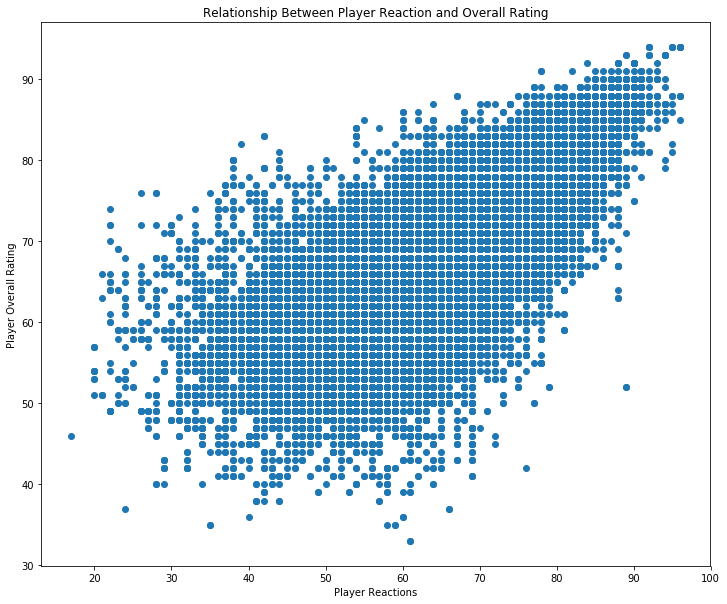

In [204]:
from matplotlib.pyplot import figure
import  matplotlib.pyplot as plt
figure(num=None, figsize=(12,10), facecolor='w', edgecolor='B')
plt.scatter(df.reactions, df.overall_rating)
plt.xlabel('Player Reactions')
plt.ylabel('Player Overall Rating')
plt.title("Relationship Between Player Reaction and Overall Rating")
pyplot.show()

### Now use Seaborn just for fun to do another plot with the Least Squares line :)



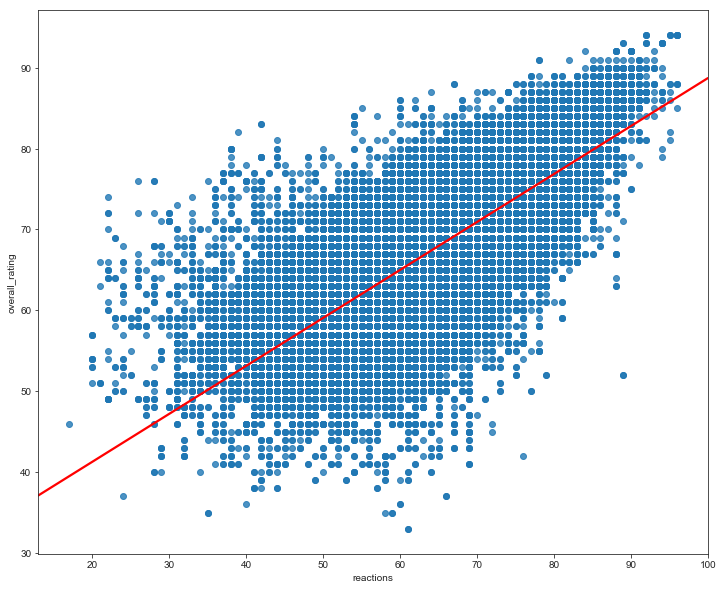

In [227]:

sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(12, 10)
sns.regplot('reactions', 'overall_rating', df, line_kws = {"color":"r"}, ci=None)


### Plot Potential V Rating

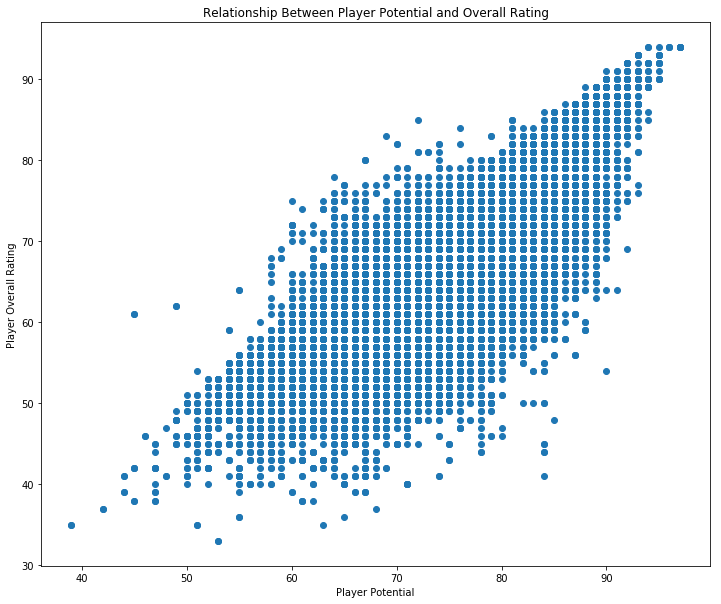

In [205]:
figure(num=None, figsize=(12,10), facecolor='w', edgecolor='B')
plt.scatter(df.potential, df.overall_rating)
plt.xlabel('Player Potential')
plt.ylabel('Player Overall Rating')
plt.title("Relationship Between Player Potential and Overall Rating")
pyplot.show()

In [206]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='overall_rating ~ reactions + potential', data=df).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                 2.669e+05
Date:                Wed, 25 Jul 2018   Prob (F-statistic):               0.00
Time:                        09:27:32   Log-Likelihood:            -4.8349e+05
No. Observations:              180354   AIC:                         9.670e+05
Df Residuals:                  180351   BIC:                         9.670e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9872      0.094     64.015      0.000       5.804       6.171
reactions      0.3795      0.001    339.663      0.000       0.377       0.382
potential      0.5109      0.002    329.122      0.000       0.508       0.514
==============================================================================
Omnibus:                    21652.406   Durbin-Watson:                   0.395
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56282.876
Skew:                          -0.684   Prob(JB):                         0.00
Kurtosis:                       5.370   Cond. No.                     1.12e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Now lets run our linear regression with not just two, but the top 7 variables!

Usually R-Squared will increase as more variables are added because R-Squared minimizes the sum of square errors thus it is not always reliable as a new variable can be either zero, or non-zero, thus improving the quality of fit :) -- However, since I ran pearson first above, we know which variables are worthy of adding, thus our r-squared below is good :)


In [207]:
feature_columns = ['overall_rating', 'reactions', 'potential', 'short_passing', 'long_passing','ball_control', 'vision', 'shot_power']
X = df[feature_columns]
y = df.overall_rating
lm = LinearRegression()
lm.fit(X,y)

print(lm.intercept_)
print(lm.coef_)

1.8474111129762605e-12
[ 1.00000000e+00 -8.27076147e-16 -6.37127795e-17 -3.22179196e-16
 -2.46487429e-18 -3.09786507e-16  2.63788401e-16  5.55275669e-16]


In [208]:
lm = smf.ols(formula='overall_rating ~ reactions + potential + short_passing + long_passing + ball_control + vision + shot_power', data=df).fit()
#display(lm.rsquared)
#display(lm.resid)
#display(lm.fvalue)
#display(lm.params.Intercept)
#display(lm.params.lstat)
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                 8.089e+04
Date:                Wed, 25 Jul 2018   Prob (F-statistic):               0.00
Time:                        09:27:32   Log-Likelihood:            -4.7948e+05
No. Observations:              180354   AIC:                         9.590e+05
Df Residuals:                  180346   BIC:                         9.591e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.6254      0.092     61.085      0.000       5.445       5.806
reactions         0.3548      0.001    303.481      0.000       0.352       0.357
potential         0.5033      0.002    324.132      0.000       0.500       0.506
short_passing     0.0031      0.002      1.930      0.054   -4.79e-05       0.006
long_passing      0.0510      0.001     51.949      0.000       0.049       0.053
ball_control     -0.0384      0.001    -28.066      0.000      -0.041      -0.036
vision           -0.0161      0.001    -17.660      0.000      -0.018      -0.014
shot_power        0.0456      0.001     56.094      0.000       0.044       0.047
==============================================================================
Omnibus:                    18238.928   Durbin-Watson:                   0.390
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46323.238
Skew:                          -0.591   Prob(JB):                         0.00
Kurtosis:                       5.183   Cond. No.                     1.92e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""